In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')


In [6]:
df=pd.read_csv("dataframe_.csv")
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [39]:
df.shape

(1697, 2)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input,1696.0,1.159933,79.005970,-134.962839,-63.386506,10.195194,70.264109,134.605775
output,1696.0,-34.088017,65.771112,-132.422167,-80.026767,-50.470981,-11.000000,134.425495


In [11]:
#checking correlation
df.corr()

,input,output
input,1.000000,0.511776
output,0.511776,1.000000


<AxesSubplot:>

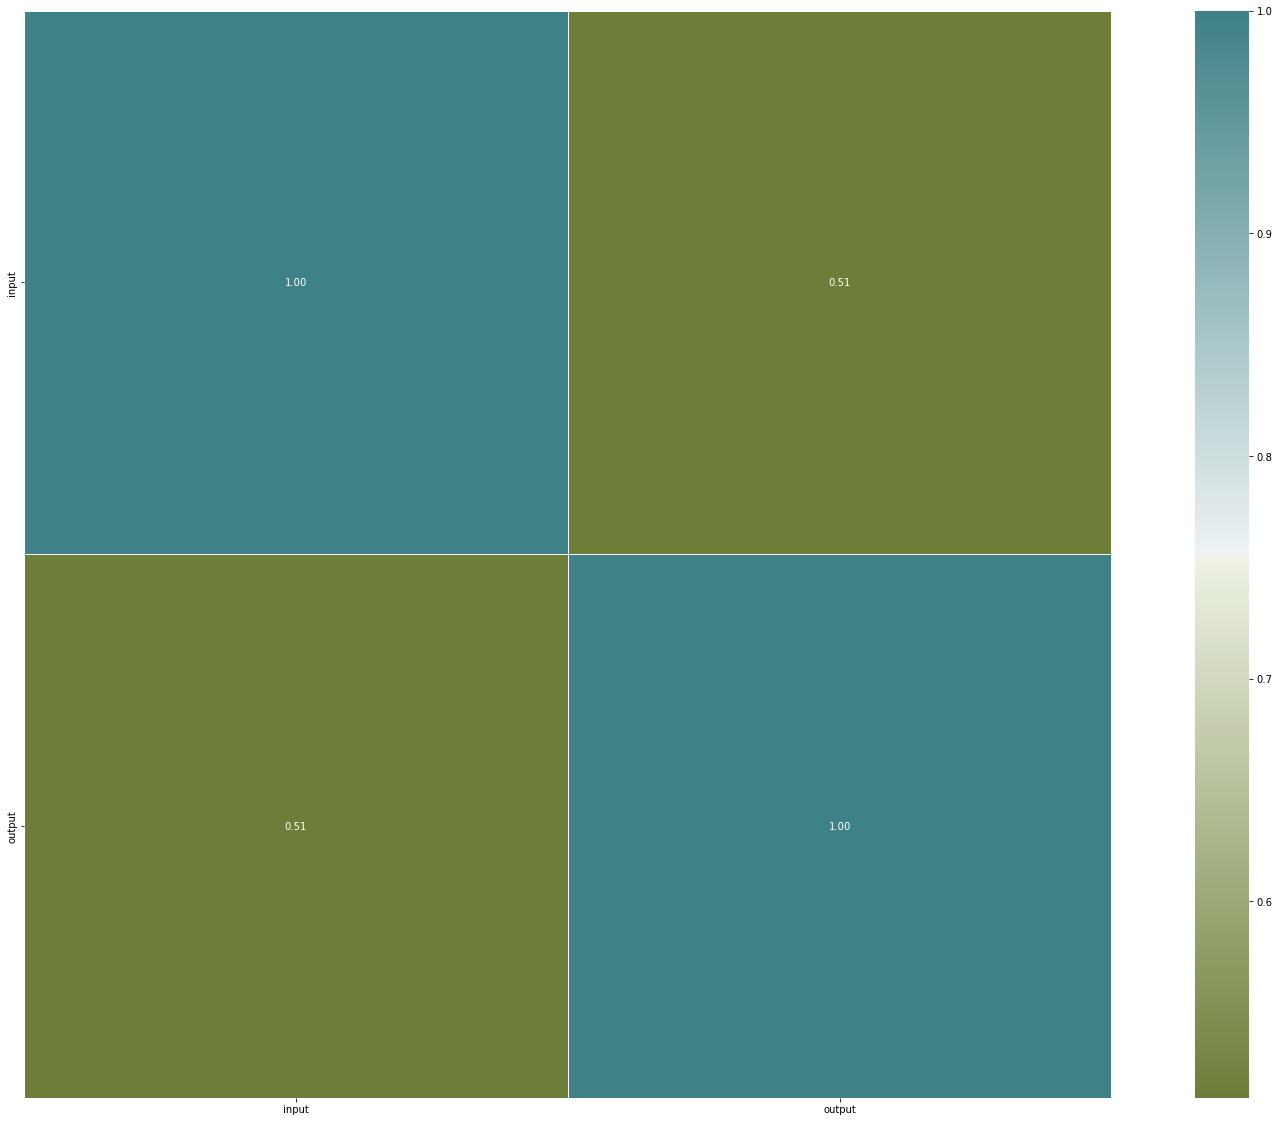

In [16]:
#correlation map
cax=plt.subplots(figsize=(30,20))
corr=df.corr()
sns.heatmap(corr, annot=True , linewidths=1, fmt='.2f', 
            mask= np.zeros_like(corr,dtype=np.bool),            
            cmap=sns.diverging_palette(100,200,as_cmap=True),
            square=True)


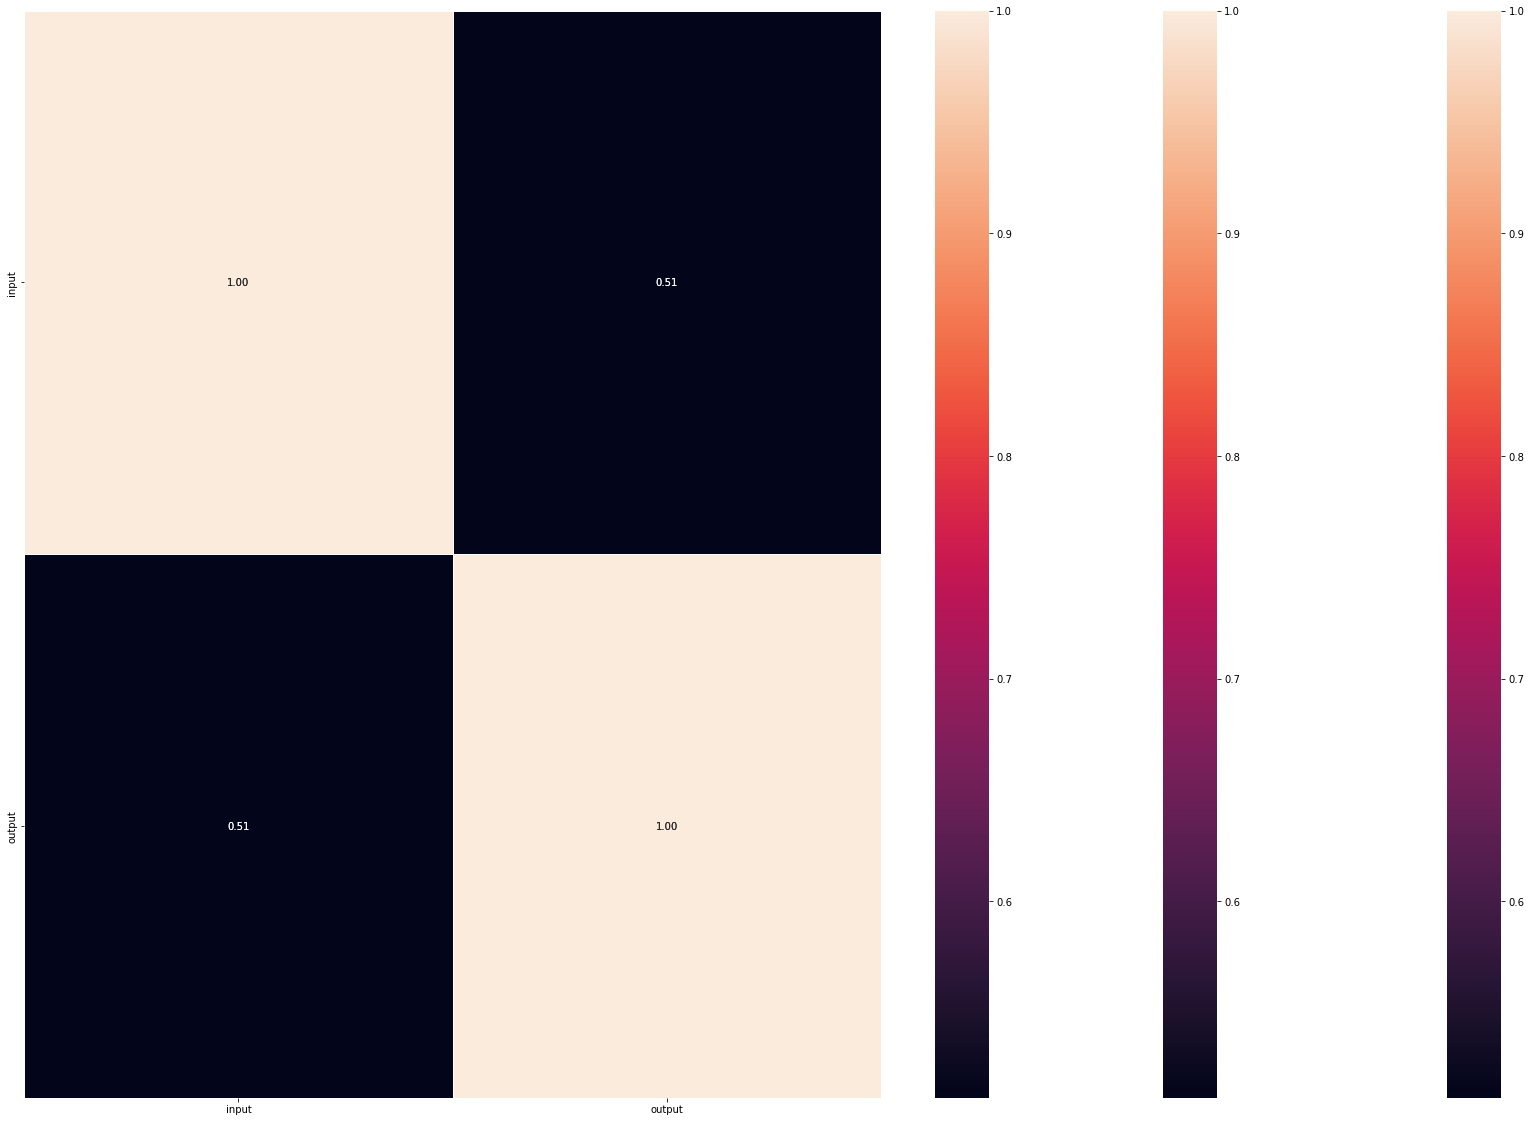

In [17]:
ax=plt.subplots(figsize=(30,20))
sns.heatmap(df.corr());
sns.heatmap(corr, annot=True, linewidths=1, fmt='.2f') 
mask= np.zeros_like(corr,dtype=np.bool)
sns.heatmap(corr, annot=True, linewidths=1, fmt='.2f') 
mask= np.zeros_like(corr,dtype=np.bool)

In [18]:
#checking for missing data 
df.isnull().sum()

input     1
output    1
dtype: int64

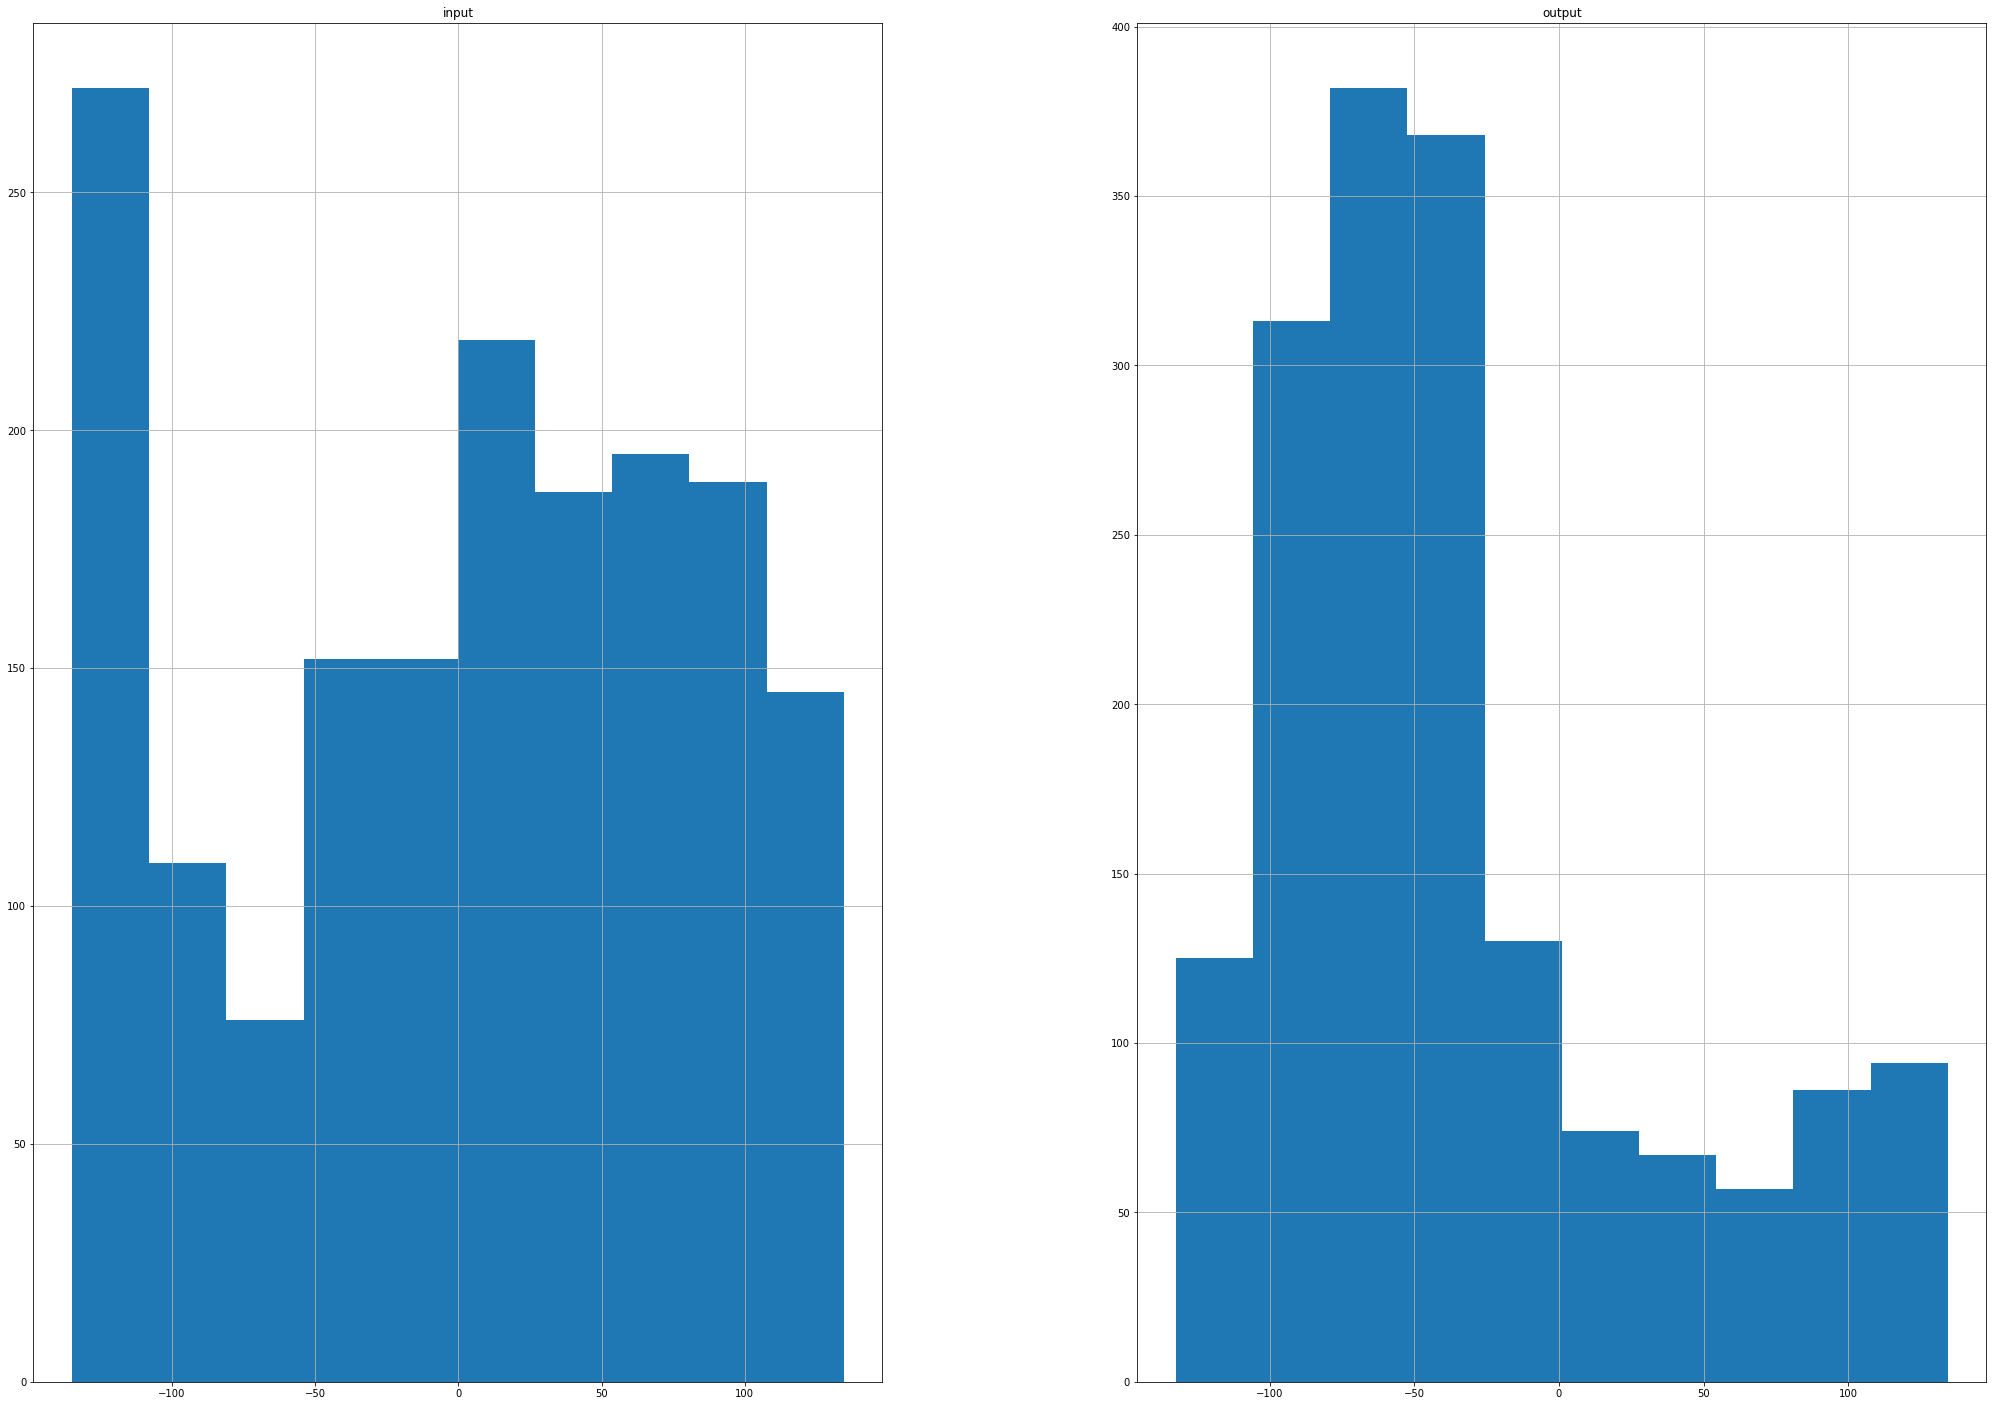

In [19]:
df.hist(figsize = (35,25))
plt.show()

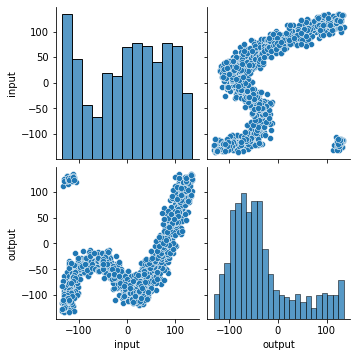

In [20]:
sns.pairplot(df)

In [30]:
def conti_var(x):

    fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(16,5),tight_layout=False)

    axes[0].set_title('Distribution')
    sns.histplot(x,ax=axes[0])
    axes[0].grid()

    axes[1].set_title('Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[1].grid()

    axes[2].set_title('relaation wrt to output variable')
    sns.boxplot(x=df.Potability,y=x,ax=axes[2])
    axes[2].grid()

    sns.distplot(x,ax=axes[3])
    axes[3].grid()
    
plt.show()

In [31]:
df1 = pd.DataFrame(df)

# Calculate the skewness of each column
skewness = df1.skew()

# Iterate over the skewness values and print the skewness type
for col, value in skewness.items():
    if value > 0:
        print(f'{col} is positively skewed----->',value)
    elif value < 0:
        print(f'{col} is negatively skewed----->', value)
    else:
        print(f'{col} is neutral---------------->',value)

input is negatively skewed-----> -0.20318515325323347
output is positively skewed-----> 1.0573226471779904


In [40]:
#checking for duplicates in the dataset
df1=df.drop_duplicates(keep='first')

In [41]:
df1.shape

(1091, 2)

<AxesSubplot:xlabel='input', ylabel='output'>

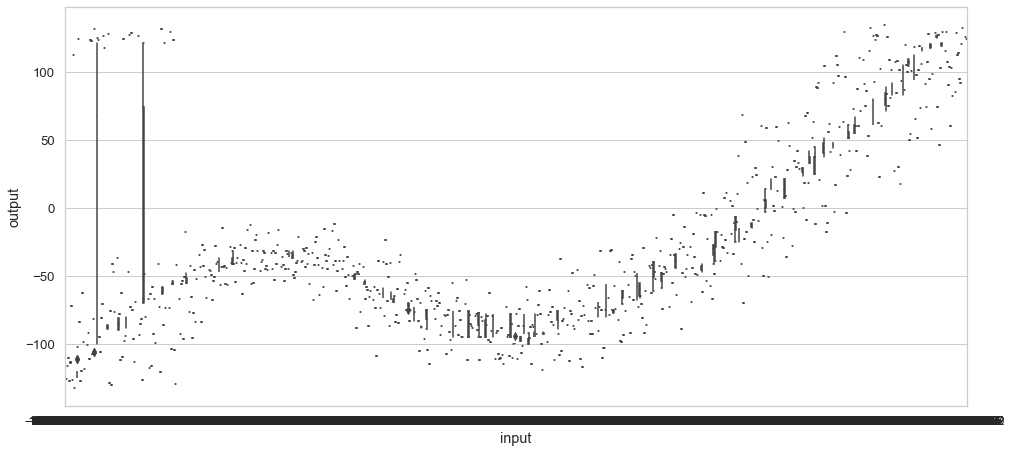

In [42]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (55,25))
plt.subplot(3,3,1)
sns.boxplot(x='input', y='output', data=df)

In [43]:
x=df.drop("input",axis=1)
y=df.iloc[:,5:6]
x.head()

,output
0,-130.572085
1,-129.938929
2,-130.141832
3,-125.760932
4,-112.785214


In [44]:
y.head()

""
0
1
2
3
4


In [45]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [46]:
#shape of train and test
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(1187, 1) (1187, 0)
(510, 1) (510, 0)


In [89]:
!pip install sweetviz
!pip install pandas_profiling
#pip install markupsafe
import sweetviz as sv 
sweet_report = sv.analyze(df)
sweet_report.show_html('dataframe.html')

                                             |                                             | [  0%]   00:00 ->…

Report dataframe.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [49]:
import numpy as np
np.seterr(all='warn')
A = np.array([10])
a=A[-1]
a**a
import pandas_profiling as pp
EDA_report= pp.ProfileReport(df)
EDA_report.to_file(output_file='report.html') 
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
q1=df.input.quantile(0.25)
q3=df.input.quantile(0.75)
iqr=q3-q1
iqr

133.65061478

In [51]:
ub=q3+1.5*iqr
ub

270.74003089

In [52]:
lb=q1-1.5*iqr
lb

-263.86242823000003

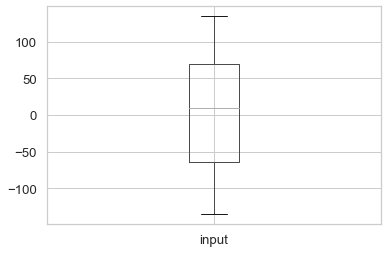

In [53]:
df.boxplot('input')
plt.show()

In [68]:
q1=df.output.quantile(0.25)
q3=df.output.quantile(0.75)
iqr=q3-q1
iqr

69.02676665

In [69]:
ub=q3+1.5*iqr
ub

92.54014997499999

In [70]:
lb=q1-1.5*iqr
lb

-183.56691662499998

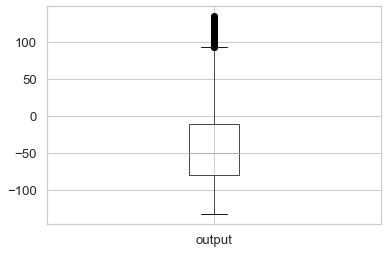

In [71]:
df.boxplot('output')
plt.show()

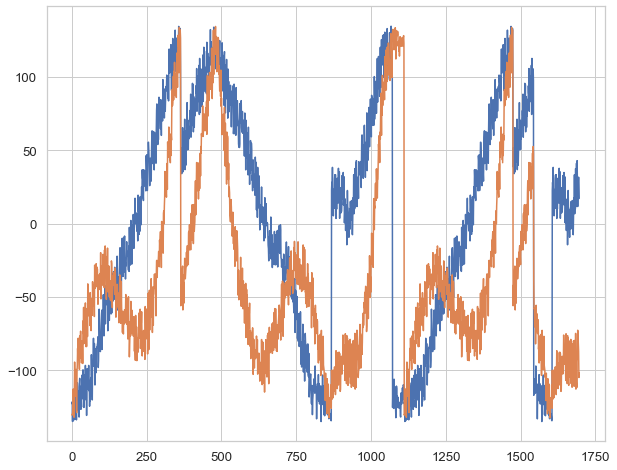

In [72]:
#Graphical Representation
plt.figure(figsize=(10,8))
plt.plot(df)
plt.show()

In [73]:
Feature_Columns = {"input", "output"}

In [74]:
X = df[Feature_Columns]

In [75]:
x

,output
0,-130.572085
1,-129.938929
2,-130.141832
3,-125.760932
4,-112.785214
...,...
1692,-76.380902
1693,-82.796934
1694,-87.000000
1695,-104.943052


In [76]:
Y = df[['output']]

In [105]:
y

0      -1.568706
1      -1.553396
2      -1.722871
3      -1.541678
4      -1.659284
          ...   
1692    0.307033
1693    0.359286
1694    0.385824
1695    0.353641
1696    0.202391
Name: bonus, Length: 1696, dtype: float64

<AxesSubplot:xlabel='input', ylabel='output'>

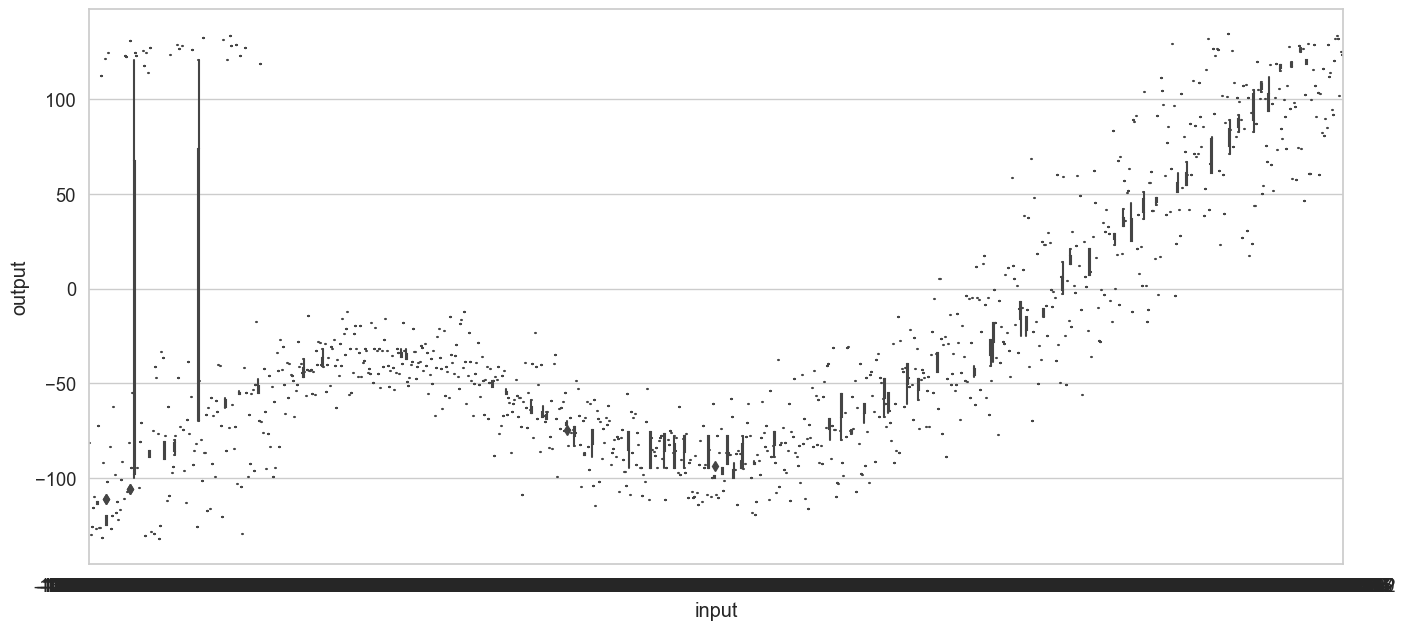

In [106]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (55,25))
plt.subplot(3,3,1)
sns.boxplot(x='input', y='output', data=df)

In [107]:
x=df.drop("input",axis=1)
y=df.iloc[:,5:6]
x.head()

,output,bonus
0,-130.572085,-1.568706
1,-129.938929,-1.553396
2,-130.141832,-1.722871
3,-125.760932,-1.541678
4,-112.785214,-1.659284


# Feature Selection

In [109]:
import pandas as pd
df=pd.read_csv('dataframe_.csv')
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [110]:
X=df.iloc[:,:-1]
y=df['input']

In [111]:
X.head()

,input
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781


In [112]:
y.head()

0   -122.740667
1   -121.531419
2   -134.917019
3   -120.605951
4   -129.894781
Name: input, dtype: float64

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [114]:
df.shape

(1697, 2)

In [115]:
#checking for duplicates fot dataset
data1=df.drop_duplicates(keep='first')

In [116]:
data1

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885
1110,-110.344221,123.087950


In [117]:
data1.shape

(1091, 2)

In [118]:
data1.fillna(0)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885
1110,-110.344221,123.087950


In [119]:
for i in df.columns:
    print(len(df[i].unique()))

992
970


In [120]:
df.value_counts().sort_values(ascending=False).head(10)

input        output     
-125.366669   131.000000    9
 6.633331    -95.000000     4
 3.633331    -95.000000     4
-117.366669  -75.000000     4
 20.633331   -95.000000     4
-131.366669  -125.000000    4
-63.366669   -33.000000     4
 12.633331   -95.000000     3
 2.633331    -95.000000     3
-121.650403  -75.561338     2
dtype: int64

In [121]:
lst_10=df.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [122]:
lst_10

[(-125.3666687, 131.0),
 (6.633331299, -95.0),
 (3.633331299, -95.0),
 (-117.3666687, -75.0),
 (20.6333313, -95.0),
 (-131.3666687, -125.0),
 (-63.3666687, -33.0),
 (12.6333313, -95.0),
 (2.633331299, -95.0),
 (-121.6504035, -75.56133809)]

In [123]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['input']==categories,1,0)

In [124]:
lst_10.append('input')

In [125]:
import warnings
warnings.filterwarnings("ignore")
df[lst_10]

,"(-125.3666687, 131.0)","(6.633331299, -95.0)","(3.633331299, -95.0)","(-117.3666687, -75.0)","(20.6333313, -95.0)","(-131.3666687, -125.0)","(-63.3666687, -33.0)","(12.6333313, -95.0)","(2.633331299, -95.0)","(-121.6504035, -75.56133809)",input
0,0,0,0,0,0,0,0,0,0,0,-122.740667
1,0,0,0,0,0,0,0,0,0,0,-121.531419
2,0,0,0,0,0,0,0,0,0,0,-134.917019
3,0,0,0,0,0,0,0,0,0,0,-120.605951
4,0,0,0,0,0,0,0,0,0,0,-129.894781
...,...,...,...,...,...,...,...,...,...,...,...
1692,0,0,0,0,0,0,0,0,0,0,25.410184
1693,0,0,0,0,0,0,0,0,0,0,29.537304
1694,0,0,0,0,0,0,0,0,0,0,31.633331
1695,0,0,0,0,0,0,0,0,0,0,29.091458


In [126]:
df.isnull().sum()

input                           1
output                          1
(-125.3666687, 131.0)           0
(6.633331299, -95.0)            0
(3.633331299, -95.0)            0
(-117.3666687, -75.0)           0
(20.6333313, -95.0)             0
(-131.3666687, -125.0)          0
(-63.3666687, -33.0)            0
(12.6333313, -95.0)             0
(2.633331299, -95.0)            0
(-121.6504035, -75.56133809)    0
dtype: int64

In [127]:
df.isnull().mean()

input                           0.000589
output                          0.000589
(-125.3666687, 131.0)           0.000000
(6.633331299, -95.0)            0.000000
(3.633331299, -95.0)            0.000000
(-117.3666687, -75.0)           0.000000
(20.6333313, -95.0)             0.000000
(-131.3666687, -125.0)          0.000000
(-63.3666687, -33.0)            0.000000
(12.6333313, -95.0)             0.000000
(2.633331299, -95.0)            0.000000
(-121.6504035, -75.56133809)    0.000000
dtype: float64

In [128]:
df['input'].isnull().sum()

1

In [129]:

df['output'].isnull().sum()

1

In [130]:

df['input'].dropna().sample(df['input'].isnull().sum(),random_state=0)

1018    75.249231
Name: input, dtype: float64

In [131]:
df['output'].dropna().sample(df['output'].isnull().sum(),random_state=0)

1018    37.274268
Name: output, dtype: float64

In [132]:
df[df['input'].isnull()].index

Int64Index([1439], dtype='int64')

In [133]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    randommedian=df.input.median()_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_samplemedian=df.input.median()

In [134]:
median=df.input.median()

In [135]:
median

10.195194444999998

In [136]:
median=df.output.median()

In [137]:
median

-50.47098063

In [138]:
impute_nan(df,"input",median)

In [139]:
impute_nan(df,"output",median)

In [140]:
Feature_Columns = {"input", "output"}

In [141]:
X = df[Feature_Columns]

In [142]:
X

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [143]:
Y = df[['output']]

In [144]:
y

0      -122.740667
1      -121.531419
2      -134.917019
3      -120.605951
4      -129.894781
           ...    
1692     25.410184
1693     29.537304
1694     31.633331
1695     29.091458
1696     17.145296
Name: input, Length: 1697, dtype: float64

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=12)

In [146]:
df['input'].unique()

array([-1.227e+02, -1.215e+02, -1.349e+02, -1.206e+02, -1.299e+02,
       -1.344e+02, -1.156e+02, -1.321e+02, -1.334e+02, -1.195e+02,
       -1.257e+02, -1.141e+02, -1.314e+02, -1.133e+02, -1.338e+02,
       -1.217e+02, -1.274e+02, -1.085e+02, -1.113e+02, -1.244e+02,
       -1.191e+02, -1.144e+02, -1.224e+02, -1.319e+02, -1.093e+02,
       -1.055e+02, -1.123e+02, -1.110e+02, -1.266e+02, -1.204e+02,
       -1.251e+02, -1.034e+02, -1.153e+02, -1.194e+02, -1.049e+02,
       -9.971e+01, -1.174e+02, -1.163e+02, -1.254e+02, -1.032e+02,
       -1.154e+02, -1.203e+02, -1.133e+02, -9.670e+01, -1.020e+02,
       -1.119e+02, -1.308e+02, -1.124e+02, -9.895e+01, -1.047e+02,
       -1.129e+02, -1.104e+02, -1.086e+02, -9.669e+01, -1.140e+02,
       -1.094e+02, -1.245e+02, -1.172e+02, -1.212e+02, -1.074e+02,
       -1.050e+02, -1.177e+02, -8.940e+01, -1.034e+02, -1.006e+02,
       -1.202e+02, -9.431e+01, -9.737e+01, -9.104e+01, -7.820e+01,
       -9.516e+01, -9.337e+01, -8.177e+01, -8.702e+01, -1.100e

In [147]:
df['output'].unique()

array([-1.306e+02, -1.299e+02, -1.301e+02, -1.258e+02, -1.128e+02,
       -1.160e+02, -1.263e+02, -1.320e+02, -1.140e+02, -9.442e+01,
       -1.075e+02, -1.130e+02, -1.177e+02, -1.110e+02, -9.944e+01,
       -1.271e+02, -1.289e+02, -1.010e+02, -9.622e+01, -8.509e+01,
       -9.300e+01, -7.814e+01, -8.681e+01, -8.900e+01, -9.219e+01,
       -9.940e+01, -7.661e+01, -8.600e+01, -8.596e+01, -7.335e+01,
       -9.175e+01, -8.100e+01, -9.494e+01, -8.393e+01, -8.004e+01,
       -8.000e+01, -9.538e+01, -6.637e+01, -7.500e+01, -5.715e+01,
       -8.182e+01, -5.991e+01, -7.000e+01, -7.809e+01, -5.930e+01,
       -5.410e+01, -6.700e+01, -8.388e+01, -7.379e+01, -8.383e+01,
       -6.100e+01, -5.782e+01, -7.698e+01, -4.111e+01, -5.600e+01,
       -5.358e+01, -5.095e+01, -6.299e+01, -5.500e+01, -5.515e+01,
       -6.946e+01, -4.706e+01, -6.524e+01, -7.298e+01, -5.572e+01,
       -5.200e+01, -5.118e+01, -6.253e+01, -3.964e+01, -4.900e+01,
       -4.288e+01, -5.610e+01, -4.158e+01, -4.700e+01, -6.336e

In [148]:
prob_df=df.groupby(['input'])['output'].mean()

In [149]:
prob_df=df.groupby(['input'])['output'].mean()

In [150]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [151]:
scaler=StandardScaler()
### fit vs fit_transform
df_scaled=scaler.fit_transform(df)

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
df_scaled

array([[-1.569, -1.467,  0.   , ..., -1.569, -1.468, -1.468],
       [-1.553, -1.458,  0.   , ..., -1.554, -1.458, -1.458],
       [-1.723, -1.461,  0.   , ..., -1.723, -1.461, -1.461],
       ...,
       [ 0.386, -0.805,  0.   , ...,  0.385, -0.805, -0.805],
       [ 0.354, -1.078,  0.   , ...,  0.353, -1.078, -1.078],
       [ 0.202, -1.029,  0.   , ...,  0.202, -1.029, -1.029]])

In [154]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,input,output,"(-125.3666687, 131.0)","(6.633331299, -95.0)","(3.633331299, -95.0)","(-117.3666687, -75.0)","(20.6333313, -95.0)","(-131.3666687, -125.0)","(-63.3666687, -33.0)","(12.6333313, -95.0)","(2.633331299, -95.0)","(-121.6504035, -75.56133809)",input_median,input_random,output_median,output_random
0,0.045340,0.006933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045340,0.045340,0.006933,0.006933
1,0.049826,0.009306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049826,0.049826,0.009306,0.009306
2,0.000170,0.008545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000170,0.000170,0.008545,0.008545
3,0.053259,0.024963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053259,0.053259,0.024963,0.024963
4,0.018801,0.073589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018801,0.018801,0.073589,0.073589


In [155]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,input,output,"(-125.3666687, 131.0)","(6.633331299, -95.0)","(3.633331299, -95.0)","(-117.3666687, -75.0)","(20.6333313, -95.0)","(-131.3666687, -125.0)","(-63.3666687, -33.0)","(12.6333313, -95.0)","(2.633331299, -95.0)","(-121.6504035, -75.56133809)",input_median,input_random,output_median,output_random
0,-0.994652,-1.160435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.993253,-0.996051,-1.160435,-1.161799
1,-0.985604,-1.151263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.984205,-0.987004,-1.151263,-1.152626
2,-1.085758,-1.154202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.084359,-1.087157,-1.154202,-1.155566
3,-0.978680,-1.090736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.977280,-0.980079,-1.090736,-1.092099
4,-1.048181,-0.902755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.046781,-1.049580,-0.902755,-0.904118
